In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline


# 그래프 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
import os # 운영체제(operating system) 관련 패키지 호출

# 현재 작업 디렉토리 확인
os.getcwd()

# 작업 디렉토리 변경
os.chdir('c:/data/p_3')


In [2]:
# 데이터 불러오기
food = pd.read_csv('food_clean+remove_outlier.csv')
food.head()

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Weight,Defect,Defect_Type
0,L003,A,주간,O8,26.4,42.9,99.92,0,양품
1,L029,B,주간,O2,24.3,57.7,101.77,0,양품
2,L035,A,주간,O4,23.5,44.3,99.82,0,양품
3,L039,C,주간,O3,24.4,38.2,100.60,0,양품
4,L018,A,야간,O9,26.5,44.4,99.76,0,양품


## 공정 능력 분석(전)

In [3]:
from statsmodels.stats.diagnostic import normal_ad
import capability_analysis
from capability_analysis import capability_analysis_normal
from capability_plot import plot_capability

In [4]:
food["sub"] = food.index // 2 + 1
food.head()

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Weight,Defect,Defect_Type,sub
0,L003,A,주간,O8,26.4,42.9,99.92,0,양품,1
1,L029,B,주간,O2,24.3,57.7,101.77,0,양품,1
2,L035,A,주간,O4,23.5,44.3,99.82,0,양품,2
3,L039,C,주간,O3,24.4,38.2,100.60,0,양품,2
4,L018,A,야간,O9,26.5,44.4,99.76,0,양품,3


In [5]:
result = capability_analysis_normal(
    food, value_col = 'Weight',
    subgroup_col = 'sub',
    LSL = 98, USL = 102,
    within_method = 'range')

print(result)

                       Result
n                     415.000
mean                   99.972
stdev (overall)         1.012
sigma (within)          1.025
Cp                      0.650
Cpk                     0.641
Pp                      0.659
Ppk                     0.650
Z.bench (within)        1.924
Z.bench (overall)       1.949
PPM Observed        53012.048
PPM Within         996753.858
PPM Overall        996871.859


## 정규성 검정

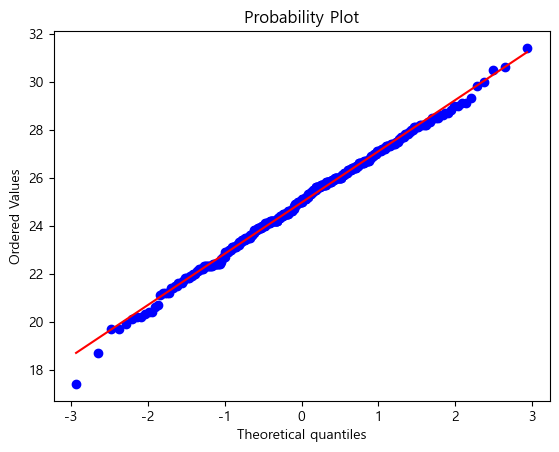

In [6]:
ad_food = normal_ad(food['Temp'])
ad_food

stats.probplot(food['Temp'], plot = plt)
plt.show()

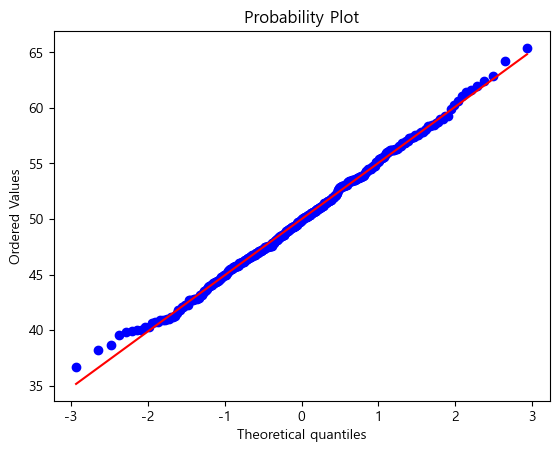

In [7]:
ad_food = normal_ad(food['Humidity'])
ad_food

stats.probplot(food['Humidity'], plot = plt)
plt.show()

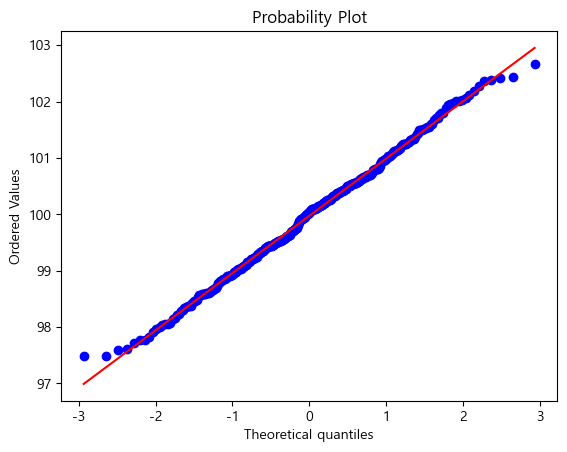

In [8]:
ad_food = normal_ad(food['Weight'])
ad_food

stats.probplot(food['Weight'], plot = plt)
plt.show()

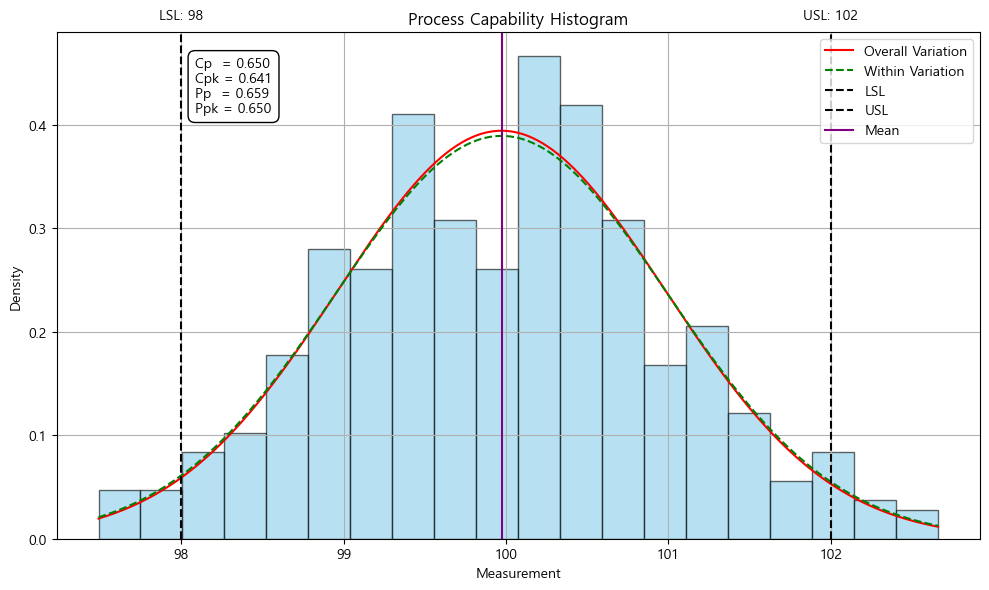

In [10]:
plot_capability(food, value_col = "Weight", LSL = 98, USL = 102, result = result)
plt.show()      